In [ ]:
#Notes
#Nissan: 66,250
#when grouped by state --> 59 (need to consolidate duplicates)
#Models in Tennessee: 'Versa', 'Altima', 'Sentra', 'Rogue', 'Maxima', 'Murano','Titan', 'Quest', 'Pathfinder', 'Xterra', 'NV', 'Armada', '370Z','GT-R'


In [ ]:
#Findings
#Tennessee: 1976 listings, Altima is the most available
#United States: 
    #southeast/southwest: Altima most available (only 1 state did not have Altima as highest number of listings)
    #midwest (plains): there are more states with Rogue as highest number of listings than Altima as the highest
    #Alaska: only state with most Pathfinder listings
    #Nevada/Hawaii: only two states with most Versa listings


In [31]:
#Dependencies and Setup

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
#Name dataframe for cleaned data csv
csv = "Data/Cleaned_Data.csv"

#Read the data
car_df = pd.read_csv(csv)

In [3]:
#List of only Nissan vehicles
nissan_df = car_df.loc[car_df["Make"]=="Nissan"]
nissan_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [4]:
#Combining duplicate states (i.e. Va and VA)

nissan_df = nissan_df.replace(to_replace = " Va", value = " VA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Fl", value = " FL", regex=False)
nissan_df = nissan_df.replace(to_replace = " Az", value = " AZ", regex=False)
nissan_df = nissan_df.replace(to_replace = " Ca", value = " CA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Ga", value = " GA", regex=False)
nissan_df = nissan_df.replace(to_replace = " ga", value = " GA", regex=False)
nissan_df = nissan_df.replace(to_replace = " Md", value = " MD", regex=False)
nissan_df = nissan_df.replace(to_replace = " Oh", value = " OH", regex=False)


In [5]:
#Determining model availability in Tennessee

tn_df = nissan_df.loc[nissan_df['State']==' TN']
tn_df.set_index('Vin')
tnmodel = tn_df.groupby('New_Model')
tnmodelcount = tnmodel['Vin'].count()

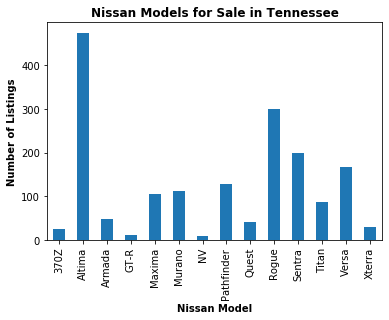

In [55]:
#Graphing model availability in Tennessee

tnmodelcount.plot.bar()
plt.title('Nissan Models for Sale in Tennessee', fontweight='bold')
plt.xlabel('Nissan Model', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.show()

In [28]:
#Determining model availability across the United States
nissan_df.set_index('Vin')
nissanmodel = nissan_df.groupby('New_Model')
nissanmodelcount = nissanmodel['Vin'].count()
nissanmodelcount

New_Model
370Z            902
Altima        15967
Armada         1334
GT-R            137
Maxima         3785
Murano         4338
NV              505
Pathfinder     4434
Quest          1033
Rogue         10491
Sentra         7664
Titan          1994
Versa          5510
Xterra          938
Name: Vin, dtype: int64

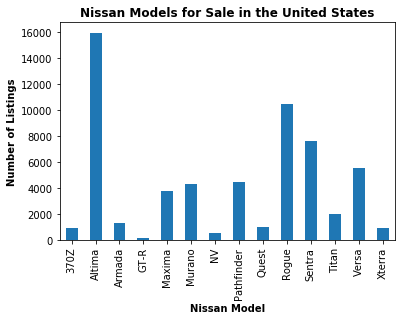

In [56]:
#Graphing model availability in the United States

nissanmodelcount.plot.bar()
plt.title('Nissan Models for Sale in the United States', fontweight='bold')
plt.xlabel('Nissan Model', fontweight='bold')
plt.ylabel('Number of Listings', fontweight='bold')
plt.show()

In [7]:
#Grouping by state and new model --> exporting to csv

statecount = nissan_df.groupby(['State','New_Model'])
modelcount = statecount.count()
modelcount.to_csv('model_count.csv')


In [11]:
#Reading in new data frame for cleaned csv from above
secondcsv = "state_models.csv"

mostavailable_df = pd.read_csv(secondcsv)
mostavailable_df

,State,Most Available Model,Number of Listings,Region
0,AK,Pathfinder,36,Far West
1,AL,Altima,380,Southeast
2,AR,Altima,167,Southeast
3,AZ,Altima,451,Southwest
4,CA,Altima,1513,Far West
5,CO,Rogue,337,Rocky Mountain
6,CT,Altima,239,New England
7,DC,Altima,2,Mideast
8,DE,Rogue,51,Mideast
9,FL,Altima,1535,Southeast


In [17]:
#Grouping the most available car for each state by region
region = mostavailable_df.groupby('Region')
regioncount = region['Most Available Model'].value_counts()
regioncount

Region          Most Available Model
Far West        Altima                   3
                Altima/Versa             1
                Pathfinder               1
                Versa                    1
Great Lakes     Altima                   4
                Rogue                    1
Mideast         Altima                   4
                Rogue                    2
Midwest         Rogue                    4
                Altima                   3
New England     Altima                   4
                Rogue                    2
Rocky Mountain  Altima                   4
                Rogue                    1
Southeast       Altima                  11
                Rogue                    1
Southwest       Altima                   4
Name: Most Available Model, dtype: int64

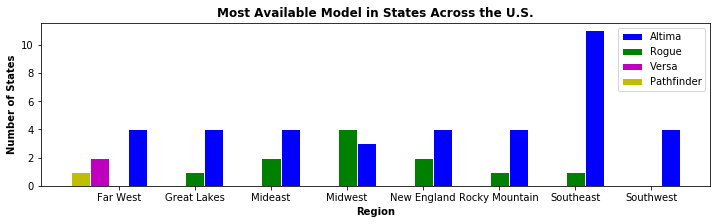

In [57]:
#Graphing the most available car for states by region

plt.figure(figsize=(12,3))

barWidth = 0.25

bars1 = [4,4,4,3,4,4,11,4]
bars2 = [0,1,2,4,2,1,1,0]
bars3 = [2,0,0,0,0,0,0,0]
bars4 = [1,0,0,0,0,0,0,0]


r1 = np.arange(len(bars1))
r2 = [x - barWidth for x in r1]
r3 = [x - barWidth for x in r2]
r4 = [x - barWidth for x in r3]


plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Altima')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='Rogue')
plt.bar(r3, bars3, color='m', width=barWidth, edgecolor='white', label='Versa')
plt.bar(r4, bars4, color='y', width=barWidth, edgecolor='white', label='Pathfinder')


plt.xlabel('Region', fontweight='bold')
plt.ylabel('Number of States', fontweight='bold')
plt.title('Most Available Model in States Across the U.S.', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(bars1))], ['Far West', 'Great Lakes', 'Mideast', 'Midwest', 'New England', 'Rocky Mountain', 'Southeast', 'Southwest'])

plt.legend()
plt.show()




In [21]:
#Grouping the most available car for each state by model
carmodel = mostavailable_df.groupby('Most Available Model')
carmodelcount = carmodel['Region'].value_counts()
carmodelcount

Most Available Model  Region        
Altima                Southeast         11
                      Great Lakes        4
                      Mideast            4
                      New England        4
                      Rocky Mountain     4
                      Southwest          4
                      Far West           3
                      Midwest            3
Altima/Versa          Far West           1
Pathfinder            Far West           1
Rogue                 Midwest            4
                      Mideast            2
                      New England        2
                      Great Lakes        1
                      Rocky Mountain     1
                      Southeast          1
Versa                 Far West           1
Name: Region, dtype: int64

In [58]:
#determining greatest availability across the country

greatestavailability = modelcount['Vin'].sort_values(ascending=False)
greatestavailability


State  New_Model
 TX    Altima       1651
 FL    Altima       1535
 CA    Altima       1513
       Sentra       1248
 TX    Rogue         925
                    ... 
 ND    Maxima          1
 SD    Versa           1
 ME    Quest           1
 UT    NV              1
 AK    370Z            1
Name: Vin, Length: 649, dtype: int64